In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Variable	Definition
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

In [4]:
data= pd.read_csv("/kaggle/input/black-friday/train.csv")

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data.shape

(550068, 12)

In [7]:
 # Target-- Purchase

 # Data understanding and cleaning
 # EDA
 # Base Model
 # Feature Selection - ANOVA, CHI-SQUARE
 # Try different models
 # Parametric Tuning    - RMSE

In [8]:
# Checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
# Checking the null values in the dataset
data.isnull().sum()/data.shape[0] *100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [10]:
# Only product_category_1 and product_category_2 have null values
# Denoting none of the customers have purchased the product- Let's replace that with '0'
data['Product_Category_2'].fillna(0,inplace=True)
data['Product_Category_3'].fillna(0,inplace=True)

In [11]:
data.isnull().sum()/data.shape[0] *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

### User_ID                       


Total number of USER_ID:  5891


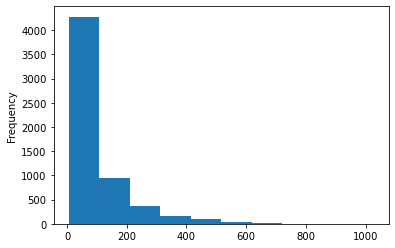

In [12]:
print("Total number of USER_ID: ", data['User_ID'].nunique())
# It seems a repeadted purchases on the same user id as it near to 6000 while the data is for 5 lakhs
# Other possiblitity only 1% have a unique user_id
data['User_ID'].value_counts().plot(kind='hist')

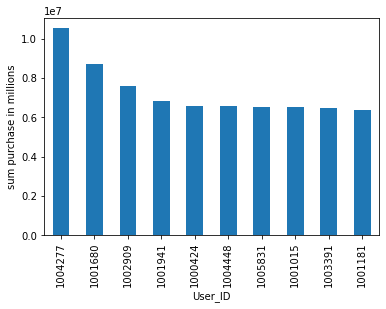

In [13]:
data.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("User_ID")
plt.ylabel("sum purchase in millions")
plt.show()

In [14]:
# We need to target the user-ID "1004277" for more increase in the sales

### Product_ID

Total number of product_id : 3631


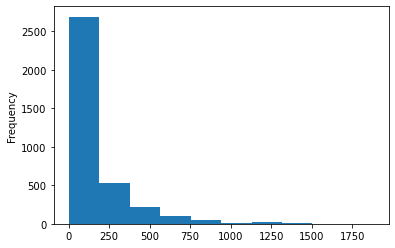

In [15]:
# Product_ID
print("Total number of product_id :",data['Product_ID'].nunique())
data['Product_ID'].value_counts().plot(kind='hist')  # Only certain Product are contributing more

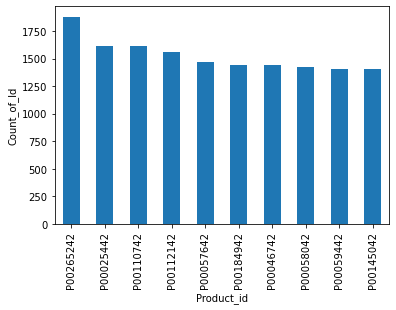

In [16]:
ss= data['Product_ID'].value_counts()[:10]
ss.plot(kind='bar')# Count wise product_id 
plt.xlabel("Product_id")
plt.ylabel("Count_of_Id")
plt.show()

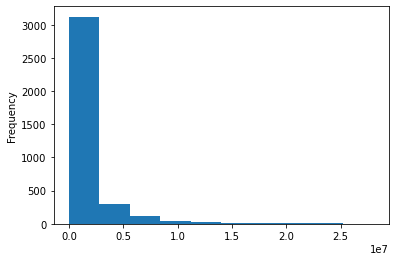

In [17]:
data.groupby(['Product_ID'])['Purchase'].sum().plot(kind='hist')

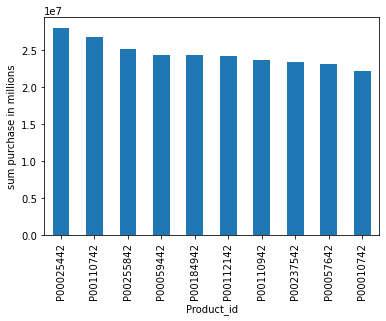

In [18]:
data.groupby(['Product_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("Product_id")
plt.ylabel("sum purchase in millions")
plt.show()

Inference:

-Our focus is to increase the price of sales not interest in the count so we need to focus on specific product_id contributing more to the purchases.

### Gender

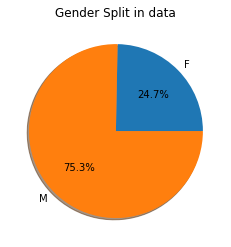

In [19]:
data_Sex = data.groupby('Gender')['Gender'].count()
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');


Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


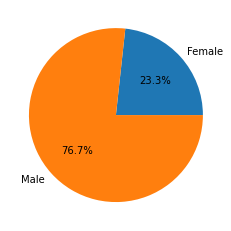

In [20]:
print(data.groupby(['Gender'])['Purchase'].sum())
data_GP=data.groupby(['Gender'])['Purchase'].sum()
plt.pie(data_GP,autopct='%1.1f%%',labels=['Female','Male'])
plt.show()

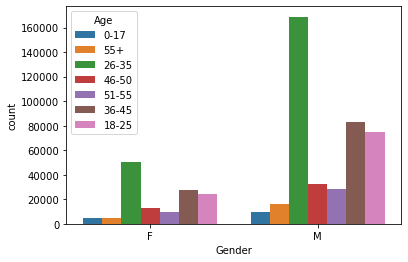

In [21]:
sns.countplot(data['Gender'],hue=data["Age"])

In [22]:
# Count of Male and Purchase sum is high  --- so we need to focus on them more

### Age

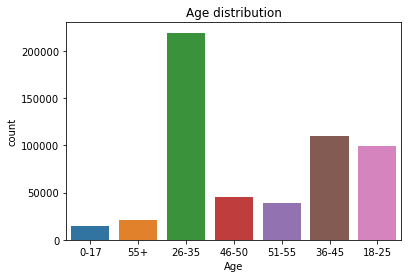

In [23]:
sns.countplot(data['Age'])
plt.title("Age distribution")
plt.show()

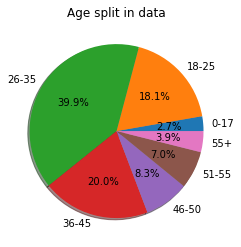

In [24]:
data_Age = data.groupby('Age')['Age'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');
plt.show()

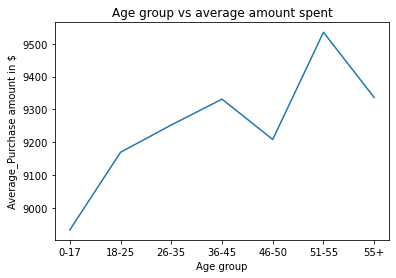

In [25]:
data.groupby('Age')['Purchase'].mean().plot()
plt.xlabel('Age group')
plt.ylabel('Average_Purchase amount in $')
plt.title('Age group vs average amount spent')
plt.show()

In [26]:
### If you observe here the puchase in the age group of 51-55 is comparatively higher with only 7%

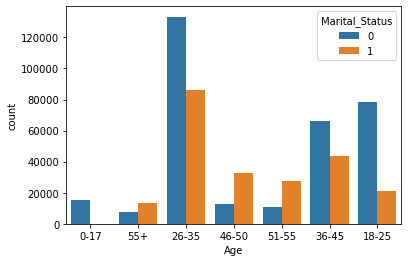

In [27]:
sns.countplot(data['Age'],hue=data["Marital_Status"])
# 1 married and 0 unmarried

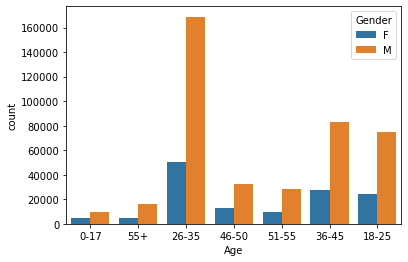

In [28]:
sns.countplot(data['Age'],hue=data["Gender"])

Inference:
- 26-35 age group where they contribute around 40% and sum of their purchases are more even though they are small- (Unmarried)
- While Unmarried are more in the contribution

### City Category

City wise Contribution B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64


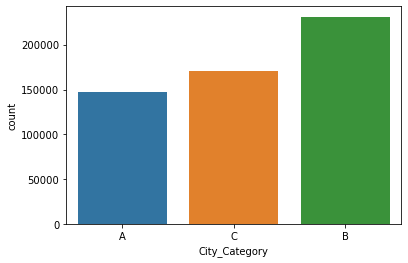

In [29]:
print("City wise Contribution", data['City_Category'].value_counts(normalize=True) *100)
sns.countplot(data['City_Category'])

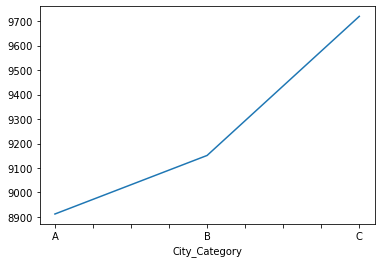

In [30]:
data.groupby('City_Category')['Purchase'].mean().plot()

Inference:
- Even the number of count in the city b is more, purchase wise City C is contributing more.

### Occupation                  

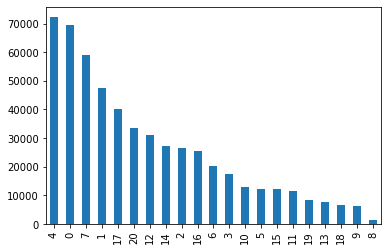

In [31]:
data['Occupation'].value_counts().plot(kind='bar')

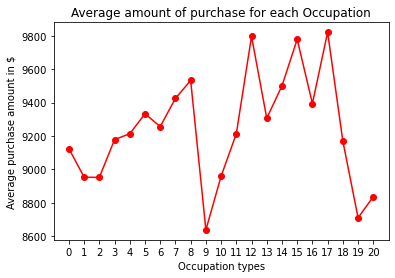

In [32]:
OS= data.groupby(['Occupation'])['Purchase'].mean()
plt.plot(OS.index,OS.values,'ro-')
plt.xticks(OS.index)
plt.xlabel('Occupation types')
plt.ylabel('Average purchase amount in $')
plt.title('Average amount of purchase for each Occupation')
plt.show()

In [33]:
# Inference
# Number of more counts in occuptation doesn't contribute more in the purchase amount
# Mean value of purchase value for occuptation 8 & 15 is more compartievly to the number of counts(Heavy Spenders)
# More effort on the less occupation (8&15) coulld generate more purchases
# Occupation 11 to 18 looks like a target are to focus in terms of raising puchases
# On other hand We can concentrate is there a possiblity of increasing the more count occupation to contribute to purchase

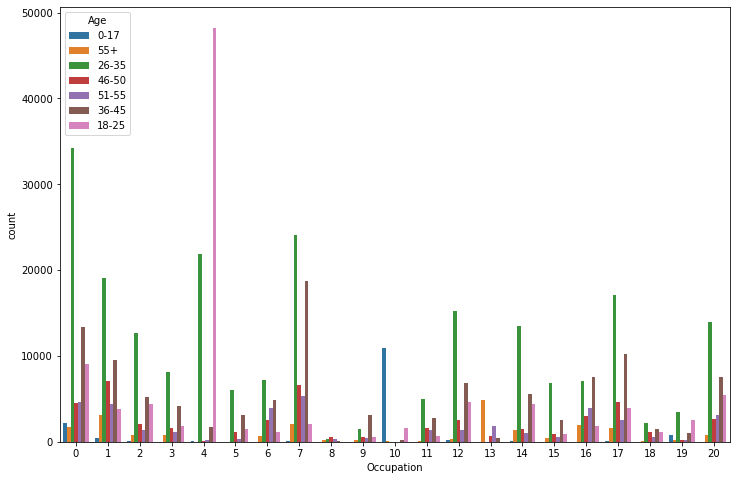

In [34]:
plt.figure(figsize=[12,8])
sns.countplot(data['Occupation'],hue=data["Age"])

Inference
- Occupation 4 which is of more count as more number of youngsters- We can focus on the product of their interest in relation to their occupation
- Age group"26-35" are almost high in every categories as they contribute 40% of the total ages, yet the puchase amount is less if we can attract them we can surely increase the sales by 5-10%

### Stay_In_Current_City_Years

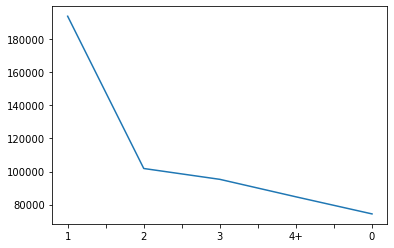

In [35]:
data['Stay_In_Current_City_Years'].value_counts().plot()

In [36]:
data1= data.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()
data2= data['Stay_In_Current_City_Years'].value_counts()
data2=pd.DataFrame({"Stay_In_Current_City_Years":data2.index, "Count":data2.values})
nw_data = pd.merge(data1,data2,left_on='Stay_In_Current_City_Years',right_on='Stay_In_Current_City_Years',how = 'left');

nw_data = nw_data.sort_values(['Stay_In_Current_City_Years'],ascending=False)[0:10];
nw_data

,Stay_In_Current_City_Years,Purchase,Count
4,4+,785884390,84726
3,3,884902659,95285
2,2,949173931,101838
1,1,1792872533,193821
0,0,682979229,74398


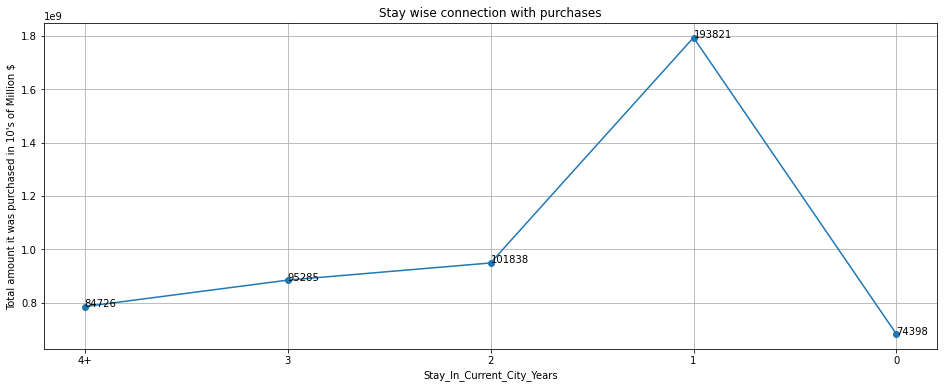

In [37]:
    
plt.figure(figsize=(16,6));
plt.grid();
plt.plot(nw_data['Stay_In_Current_City_Years'],nw_data['Purchase'],'o-');
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Stay wise connection with purchases');
for a,b,c in zip(nw_data['Stay_In_Current_City_Years'], nw_data['Purchase'], nw_data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();


Inference
- Here you can observe that the person staying 1 year are on the exploration state
- As the stay increases the purchase amount decreases maybe they have got all the stuff needed are we need to understand there requirements

### Marital_Status

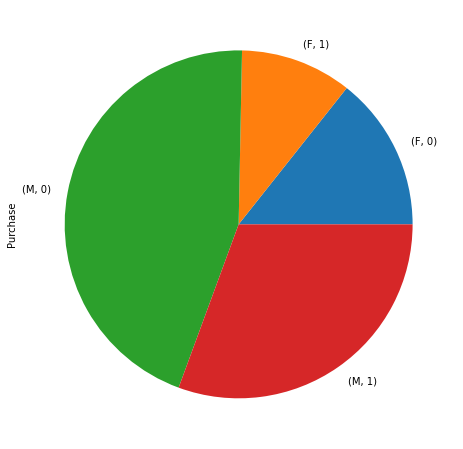

In [38]:
data.groupby(['Gender','Marital_Status'])['Purchase'].count().plot(kind='pie',figsize=(8,8))

Count of martial_status Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64
Average purchase amount Gender  Marital_Status
F       0                 8679.845815
        1                 8810.249789
M       0                 9453.756740
        1                 9413.817605
Name: Purchase, dtype: float64


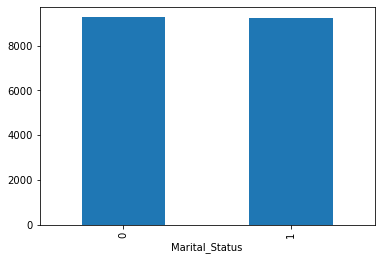

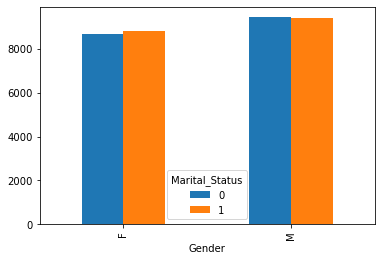

In [39]:
print("Count of martial_status", data.groupby(['Marital_Status'])['Purchase'].count())
print("Average purchase amount", data.groupby(['Gender','Marital_Status'])['Purchase'].mean())
data.groupby(['Marital_Status'])['Purchase'].mean().plot(kind='bar')
data.groupby(['Gender','Marital_Status'])['Purchase'].mean().unstack().plot(kind='bar')
plt.show()


Inference

- Unmarried count is more with both Male and Female genders - Overall purchase amount is same
- No special concentration required, show equal importance

### Product_Categories

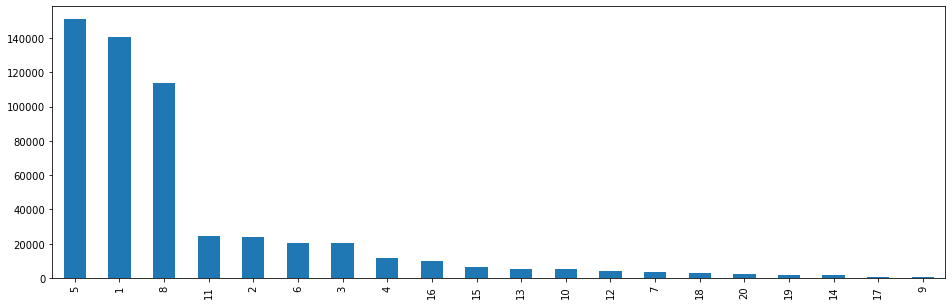

In [40]:
data['Product_Category_1'].value_counts().plot(kind= 'bar', figsize=(16,5))

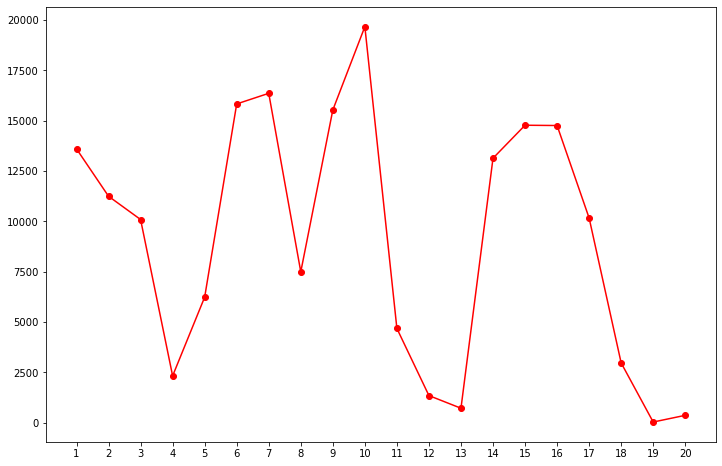

In [41]:
PC1= data.groupby('Product_Category_1')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC1.index,PC1.values,'ro-')
plt.xticks(PC1.index)
plt.show()

Inference:
- Product_catergory_1 ranges from (1000-20000)
- In product catergory 1 --> Count wise (5,1,8) contributes to the most, Purchase Amount wise(10,9,7,6) contribues more
- It may its a costly item 

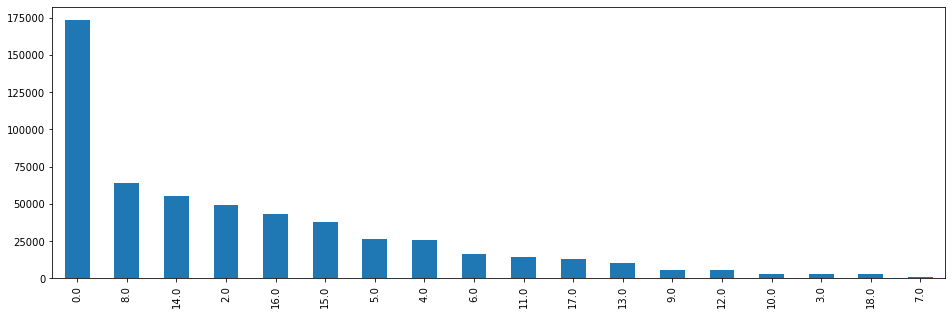

In [42]:
data['Product_Category_2'].value_counts().plot(kind= 'bar', figsize=(16,5))

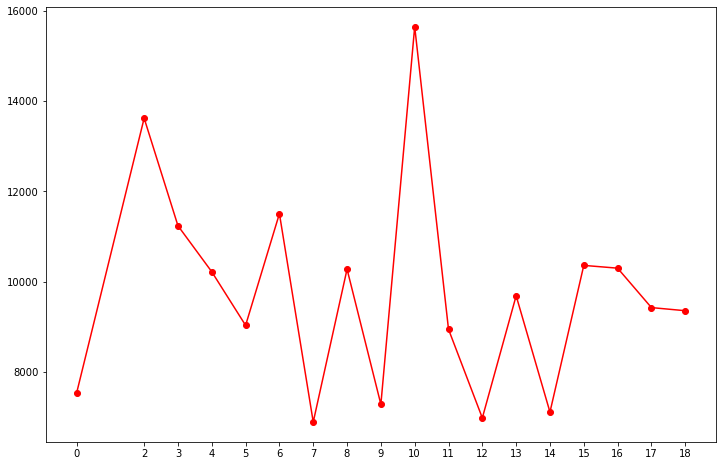

In [43]:
PC2= data.groupby('Product_Category_2')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC2.index,PC2.values,'ro-')
plt.xticks(PC2.index)
plt.show()

Inference:
- Product_catergory_2 ranges from (7000-16000)
- In product_2 category "10" contributes the wide range of purchase amount

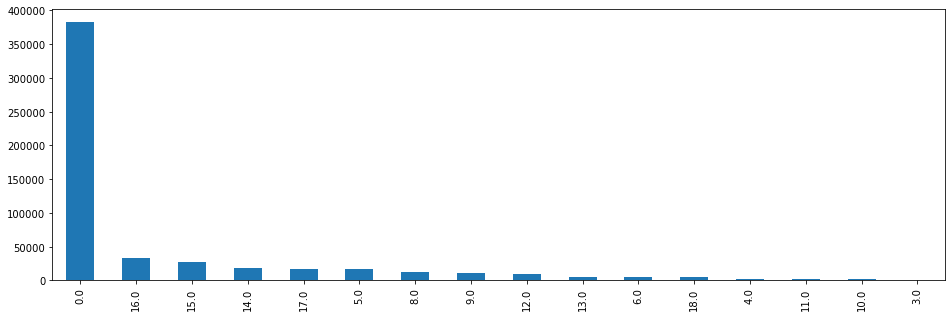

In [44]:
data['Product_Category_3'].value_counts().plot(kind= 'bar', figsize=(16,5))

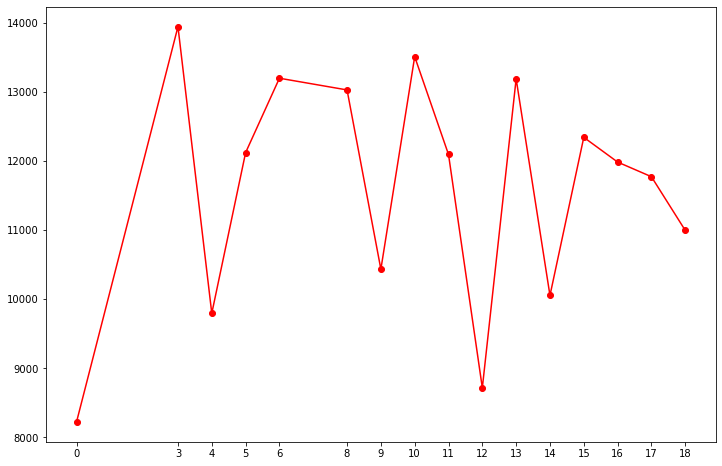

In [45]:
PC3= data.groupby('Product_Category_3')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC3.index,PC3.values,'ro-')
plt.xticks(PC3.index)
plt.show()

Inference:
- Product_catergory_3 ranges from (9000-14000)
- Product_categor_3 have a diverese range of product with the least contribution on "12" check on that.

### Purchases

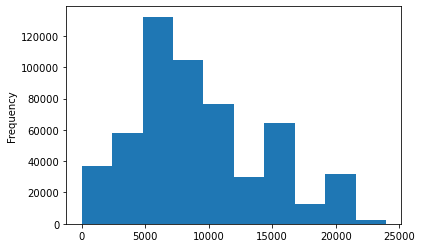

In [46]:
data['Purchase'].plot(kind='hist')

Inference- 
- Purchase peak is arround 5000 and 10000 more in relation to the count

As we can observe there is multicollinearity between product_Catory 1 ,2 and 3

### Preparing the data for the model

In [47]:
# For the base level -- Creating a copy droping the null values
df= data.copy(deep=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [49]:
# Product_categories are int
#df[['Product_Category_2','Product_Category_3']]=df[['Product_Category_2','Product_Category_3']].astype('int')
# Stay_in_city
df['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)
# df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int')

In [50]:
# Gender
df['Gender'].replace({"M":1,"F":0},inplace=True)

In [51]:
# Age
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

In [52]:
df['Age']=df['Age'].apply(map_age)

In [56]:
print(df['Product_Category_2'].describe())
print("--------------------------------")
print(df['Product_Category_3'].describe())

count    550068.000000
mean          6.735436
std           6.215492
min           0.000000
25%           0.000000
50%           5.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64
--------------------------------
count    550068.000000
mean          3.841941
std           6.250712
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max          18.000000
Name: Product_Category_3, dtype: float64


In [57]:
# Mean and Median are some _what close to each other
# Hence filling the null values with the mean

In [58]:
df['Product_Category_2']=df['Product_Category_2'].fillna(9.0).astype(int)
df['Product_Category_3']=df['Product_Category_3'].fillna(13.0).astype(int)

In [59]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [60]:
# Mapping the City_Category 

df['City_Category']=df['City_Category'].map({"B":1,"A":2,"C":3})

In [61]:
df['City_Category']= df['City_Category'].astype(int)

In [62]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int)

In [64]:
## Making a copy if these needs to included again

ddf=df.copy()

In [65]:
df = df.drop(["User_ID","Product_ID"],axis=1)
# As it contains more number of unique values

### Modelling & Validating

In [163]:
# X and Y split -- train_test_split

from sklearn.model_selection import train_test_split
X = df.drop("Purchase",axis=1)
y = df['Purchase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [94]:
# Base Model- Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [120]:
dtr= DecisionTreeRegressor()

In [121]:
dtr.fit(X_train,y_train)
d_predict= dtr.predict(X_test)

In [122]:
print("RMSE score for Decision Tree : ", np.sqrt(mean_squared_error(y_test,d_predict)))

RMSE score for Decision Tree :  2977.875333716865


### Trying Other models

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [162]:
rfc=RandomForestRegressor(n_estimators=150)
gbr=GradientBoostingRegressor()
xg=XGBRegressor()

In [124]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [101]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [164]:
xg.fit(X_train, y_train)
xg_predict= xg.predict(X_test)

### Performance check

In [165]:
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,r_predict)))
print("RMSE score for Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,g_predict)))
print("RMSE score for Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,xg_predict)))

RMSE score for Random_Forest :  6624.654854841666
RMSE score for Gradient Boosting :  6296.711503017507
RMSE score for Gradient Boosting :  2867.8690531885077


### Let's try feature selection to check if there is a improvement in the performance of the model

In [103]:
import statsmodels.api as sm

In [104]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.04):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [105]:
# Back_ward Elimination is predicting all as an important features

In [106]:
# RFE method of feature selection

In [107]:
from sklearn.feature_selection import RFE

In [108]:
rfc=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [109]:
#Initializing RFE model
rfe = RFE(rfc, 7)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [110]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model


In [111]:
rfe.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [112]:
X.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [158]:
X= df[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [115]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [116]:
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,r_predict)))

RMSE score for Random_Forest :  2942.6082275286344


In [117]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [118]:
print("RMSE score for Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,g_predict)))

RMSE score for Gradient Boosting :  3006.404545533467


In [160]:
xg.fit(X_train, y_train)
xg_predict= xg.predict(X_test)

In [161]:
print("RMSE score for XG Boosting : ", np.sqrt(mean_squared_error(y_test,xg_predict)))

RMSE score for XG Boosting :  2938.6095212948358


In [126]:
### Performance level have been improvised with the RFE feature selection without including the product_catergory 2 & 3
### But thats the worst thing to do and the best thing to do if you want only product category 1 to be compared

### Futher Analysis

In [ ]:
# We have removed the user_id and product_id entirely
# Lets try to map the frequent used and products rather than eliminating all
# Reference to other kaggle notebooks

In [127]:
# Mapping the User_ID based on the importance for the top 20 rather than excluding them totally
user_ids=ddf['User_ID']
counts=user_ids.value_counts().index[:19]
# important_counts=set(counts.index[:19])
# user_ids=user_ids.map(lambda user_id:user_id if user_id  in important_counts else 0)
#from sklearn.preprocessing import OneHotEncoder
#user_id_encoder=OneHotEncoder(categories ='auto')
#user_id_encoder.fit(user_ids.values.reshape(-1,1))

In [128]:
ddf['User_ID']=ddf['User_ID'].map(lambda user_id:user_id if user_id  in counts else 0)

def user_id_transform(ddf):
    uid=ddf['User_ID'].map(lambda user_id:user_id if user_id  in important_counts else 0).values.reshape(-1,1)
    uid=user_id_encoder.transform(uid).toarray()
    for index,category in enumerate(user_id_encoder.categories_[0]):
        ddf[str(category)]= uid[:,index]
    ddf.drop(columns=['User_ID'],inplace=True)
    return ddf

In [129]:
# Product_ID
product_means=ddf.groupby(["Product_ID"])["Purchase"].mean()
total_mean=ddf['Purchase'].mean()

In [134]:
product_means.sort_values

Product_ID
P00000142    11143.642361
P00000242    10551.851064
P00000342     5313.422131
P00000442     4795.358696
P00000542     5417.530201
                 ...     
P0099442     14351.915000
P0099642      6439.230769
P0099742      7872.603175
P0099842      7228.549020
P0099942      5572.785714
Name: Purchase, Length: 3631, dtype: float64

In [135]:
pid=product_means.sort_values(ascending=False).index[:19]

In [136]:
ddf['Product_ID']=ddf['Product_ID'].map(lambda product_id:product_id if product_id  in pid else 0)

In [139]:
ddf['User_ID']=ddf['User_ID'].astype('object')

In [144]:
nddf= pd.get_dummies(ddf,drop_first=True)

In [146]:
X=nddf.drop(['Purchase'],1)
y=nddf['Purchase']

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [148]:
rfc=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [149]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [150]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [154]:
# Trying XGboost for the many sparse matrix- tree algorithm don't perform the best
from xgboost import XGBRegressor

In [155]:
xg=XGBRegressor()

In [156]:
xg.fit(X_train, y_train)
xg_predict= xg.predict(X_test)

### Performance check

In [157]:
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,r_predict)))
print("RMSE score for Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,g_predict)))
print("RMSE score for XG Boosting : ", np.sqrt(mean_squared_error(y_test,xg_predict)))

RMSE score for Random_Forest :  3059.3985210104456
RMSE score for Gradient Boosting :  3009.6954514314684
RMSE score for XG Boosting :  2900.439627441988


### Testing 

In [166]:
## From the normal way of labelling, feature selection and top_20 user_id and product_id
## We got the best score with respect to validation from --> Normal Labeling the model without user_id and product_id rather than taking dummies on the top 20
## Hence we use that particular set for training and predicting on the test_data

In [167]:
## Checking the test_data
test= pd.read_csv("/kaggle/input/black-friday/test.csv")

In [168]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [169]:
print(" Product _category_2 \n " ,test['Product_Category_2'].describe())
print(" Product _category_3 \n " ,test['Product_Category_3'].describe())

 Product _category_2 
  count    161255.000000
mean          9.849586
std           5.094943
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64
 Product _category_3 
  count    71037.000000
mean        12.669454
std          4.125944
min          3.000000
25%          9.000000
50%         14.000000
75%         16.000000
max         18.000000
Name: Product_Category_3, dtype: float64


In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [171]:
# Similary Meand and median are colse by.
# taking a mid range to fill the null values
test['Product_Category_2']=test['Product_Category_2'].fillna(9.0).astype(int)
test['Product_Category_3']=test['Product_Category_3'].fillna(13.0).astype(int)

In [172]:
# Stay_In_Current_City_Years
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace({'4+':4})
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)
# Age
test['Age']=test['Age'].apply(map_age)
# Gender
test['Gender'].replace({"M":1,"F":0},inplace=True)
# Mapping the City_Category 
test['City_Category']=test['City_Category'].map({"B":1,"A":2,"C":3})
test['City_Category']=test['City_Category'].astype(int)



In [173]:
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [175]:
# Choosing df --> Where USER_ID,PRODUCT_ID are dropped
from sklearn.model_selection import train_test_split
X = df.drop("Purchase",axis=1)
y = df['Purchase']

In [176]:
# Model that performed the best is XG_Boost
xg.fit(X,y)
test_predict=xg.predict(test)

In [177]:
test['Purchase']=test_predict

Purchase distribution for the test data AxesSubplot(0.125,0.125;0.775x0.755)


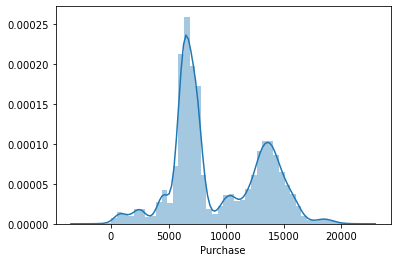

In [181]:
print("Purchase distribution for the test data", sns.distplot(test['Purchase']))

In [183]:
print("Final prediction for the test data \n ")
test.head()

Final prediction for the test data 
 


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,4,7,1,2,1,1,11,13,15593.894531
1,1,2,17,3,0,0,3,5,13,11235.905273
2,0,3,1,1,4,1,5,14,13,6296.398926
3,0,3,1,1,4,1,4,9,13,2271.106934
4,0,2,1,3,1,0,4,5,12,2827.234863


## Conclusion

- USer_ID and product_ID plays a important part in the domain but the performance of the model was better without them(seems confusing)
- As a future scope we can analyse the bias and the varaince error of the model with respect to different CrossVallidation for choosing the model
- Increase the number of USER_ID,Product_id give it a another shot
- Perform hyper tuning of the model to improvise the performance of the XG_Boost and other models